In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in the file with the data and place it in a Dataframe
Data_1 = pd.read_csv("Time_Data1.csv")
# drop the empty cells of data
Data_1 = Data_1.dropna(axis='columns')
# show only the first three columns
Data_1 = Data_1.iloc[:,0:3]
# Show the dataframe
#Data_1

In [2]:
# create a read_time_string function that takes 's' as an argument
def read_time_string(s):
    # split the 's' argument by the spaces and place in a column called times as an array
    times = s.split()
    # define four variables and set to 0
    days,hours,mins,secs = 0,0,0,0
    # for loop that goes through the entire times column array and checks whether each element should be put in a days, hours, minutes, or seconds column
    for i in range(len(times)-1):
        # check whether the element is equal to 'days', change the string to an int and place it in a days variable
        if times[i+1] == 'days':
            days = int(times[i])
        # check whether the element is equal to 'hours', change the string to an int and place it in a hours variable
        if times[i+1] == 'hours':
            hours = int(times[i])
        # check whether the element is equal to 'minutes', change the string to an int and place it in a minutes variable
        if times[i+1] == 'minutes':
            mins = int(times[i])
        # check whether the element is equal to 'seconds', change the string to an int and place it in a days variable
        if times[i+1] == 'seconds':
            secs = int(times[i])
    # Calulate the total seconds of each row it took to open the email
    total = secs + (mins*60) + (hours*3600) + (days*86400)
    return days,hours,mins,secs,total

In [3]:
# initialize four new variables equal to empty lists
Days,Hours,Mins,Secs,total_time = [],[],[],[],[]
# for loop to go through the column 'Time to Open'
for x in Data_1['Time to Open']:
    # set new variables equal to the data given when you call the read_time_string function
    d,h,m,s,t = read_time_string(x)
    # Add elements in variable d to the end of the Days list
    Days.append(d)
    # Add elements in variable h to the end of the Hours list
    Hours.append(h)
    # Add elements in variable m to the end of the Mins list
    Mins.append(m)
    # Add elements in variable s to the end of the Secs list
    Secs.append(s)
    # Add elements in variable t to the end of the totaL_time list
    total_time.append(int(t))

# Add the Days column to the original Data_1 dataframe    
Data_1['Days'] = pd.Series(Days)
# Add the Hours column to the original Data_1 dataframe 
Data_1['Hours'] = pd.Series(Hours)
# Add the Mins column to the original Data_1 dataframe 
Data_1['Mins'] = pd.Series(Mins)
# Add the Secs column to the original Data_1 dataframe 
Data_1['Secs'] = pd.Series(Secs)
# Add the total_time column to the original Data_1 dataframe 
Data_1['Total Seconds'] = pd.Series(total_time)

# define new function analyze that takes in a row as an argument
def analyze10(row):
    # check whether the element in a row in the 'Total Seconds' column is <= 20 seconds
    if row['Total Seconds'] < 10:
        # return True if < 10 seconds
        return True
    # return False if > 10 seconds
    return False

# define new function analyze that takes in a row as an argument
def analyze20(row):
    # check whether the element in a row in the 'Total Seconds' column is <= 20 seconds
    if row['Total Seconds'] <= 20 & row['Total Seconds'] >= 10:
        # return True if <= 10 seconds
        return True
    # return False if > 10 seconds
    return False

# create a new column in Data_1 called 'Bot' by using lambda to call the function analyze on all rows to place either True or False in the column, 'Bot'
Data_1['Definitely a Bot'] = Data_1.apply(lambda row: analyze10(row),axis=1)

# create a new column in Data_1 called 'Bot' by using lambda to call the function analyze on all rows to place either True or False in the column, 'Bot'
Data_1['Probably a Bot'] = Data_1.apply(lambda row: analyze20(row),axis=1)

# print Data_1 to check that it worked
#print(Data_1.head())

In [4]:
# create a new column with the split data
Data_1['Split'] = Data_1.Email.str.split('@')

# create a function that splits the email addresses and keeps only the part after the @ sign
def split_email(x):
   return x.split("@")[1]

# create a new column called Provider and place all of the split email providers in it
Data_1["Provider"] = Data_1["Email"].apply(split_email)

In [5]:
# Print out the amount of times each email provider was sent an email
Data_1["Provider"].value_counts()

yahoo.com                   108
hotmail.com                  98
gmail.com                    77
obu.edu                      45
aol.com                      41
comcast.net                  21
msn.com                      18
YAHOO.COM                    14
sbcglobal.net                13
outlook.com                  11
me.com                       11
pivotphysicaltherapy.com     10
live.com                     10
HOTMAIL.COM                   9
cox.net                       8
mac.com                       7
psu.edu                       7
msmary.edu                    7
verizon.net                   7
icloud.com                    6
att.net                       6
linfield.edu                  5
highpoint.edu                 5
COMCAST.NET                   5
pacific.edu                   5
athletics.gatech.edu          4
nn.k12.va.us                  4
winthrop.edu                  4
saintleo.edu                  4
uark.edu                      4
                           ... 
pobox.co

In [6]:
# create a list with the emails of those who are Definitely bots
dbot_email = Data_1.loc[Data_1["Definitely a Bot"] == True, "Email"]

# create a column for the email addresses of those who are definitely bots and split them
Data_1["Definitely a Bot Email Addresses"] = dbot_email.str.split('@')

# create a function to split the email addresses and keep only the part after the @ sign
def split_defemail(x):
   return x.split("@")[1]

# create a new column called Definitely a Bot Email Addresses and place all of the split email providers in it
Data_1["Definitely a Bot Email Addresses"] = Data_1.loc[Data_1["Definitely a Bot"] == True, "Email"].apply(split_defemail)

# Print out the amount of times each email provider was sent an email who are definitely bots
Data_1["Definitely a Bot Email Addresses"].value_counts()

obu.edu                     9
pivotphysicaltherapy.com    7
linfield.edu                4
msmary.edu                  4
nn.k12.va.us                3
highpoint.edu               3
saintleo.edu                2
unionps.org                 2
episd.org                   2
dmhhs.org                   2
grandview.edu               2
jenksps.org                 2
swcsd.org                   1
marin.edu                   1
sharylandisd.org            1
mccd.edu                    1
monmouth.edu                1
walsh.edu                   1
carlisleschools.org         1
tatnall.org                 1
ozarks.edu                  1
WHEELINGHOSPITAL.COM        1
BCPS.ORG                    1
crawfordmh.org              1
sjrstate.edu                1
svusd.org                   1
calbaptist.edu              1
canton.edu                  1
metrofire.ca.gov            1
stxavier.org                1
abington.k12.pa.us          1
shawnee.edu                 1
osshealth.com               1
robeson.k1

In [9]:
# create a list with the emails of those who are probably bots
pbot_email = Data_1.loc[Data_1["Probably a Bot"] == True, "Email"]

# create a column for the email addresses of those who are probably bots and split them
Data_1["Probably a Bot Email Addresses"] = pbot_email.str.split('@')

# create a function to split the email addresses and keep only the part after the @ sign
def split_probemail(x):
   return x.split("@")[1]

# create a new column called Definitely a Bot Email Addresses and place all of the split email providers in it
Data_1["Probably a Bot Email Addresses"] = Data_1.loc[Data_1["Probably a Bot"] == True, "Email"].apply(split_probemail)

# Print out the amount of times each email provider was sent an email who are definitely bots
Data_1["Probably a Bot Email Addresses"].value_counts()

hotmail.com          1
saintleo.edu         1
waldorf.edu          1
missouridelta.com    1
crawfordmh.org       1
Name: Probably a Bot Email Addresses, dtype: int64

In [7]:
# calculate the total amount of trues in the Bots column
total_true = np.sum(Data_1['Definitely a Bot'])
# calculate the total amount of falses in the Bots column
total_false = len(Data_1['Definitely a Bot'])-total_true

# calculate the total amount of trues in the Bots column
total_true2 = np.sum(Data_1['Probably a Bot'])
# calculate the total amount of falses in the Bots column
total_false2 = len(Data_1['Probably a Bot'])-total_true2

print(total_true)
print(total_false)

print(total_true2)
print(total_false2)


78
953
5
1026


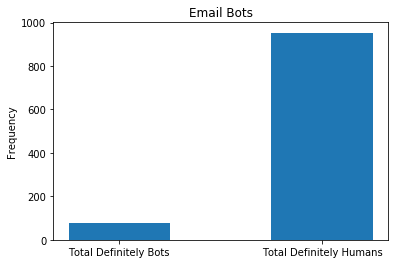

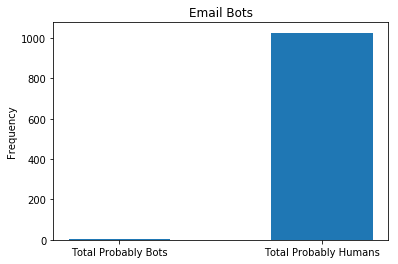

In [8]:
plt.bar([1,2],[total_true,total_false],.5,align='center')
# .5 is the bar thickness
# [1,2] is just positioning
objects = ['Total Definitely Bots','Total Definitely Humans']
plt.xticks([1,2],objects)
plt.ylabel('Frequency')
plt.title('Email Bots')
plt.show()

plt.bar([1,2],[total_true2,total_false2],.5,align='center')
# .5 is the bar thickness
# [1,2] is just positioning
objects = ['Total Probably Bots','Total Probably Humans']
plt.xticks([1,2],objects)
plt.ylabel('Frequency')
plt.title('Email Bots')
plt.show()